# Data Extraction

In [2]:
# Normal imports
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Specific imports
import rtree
import pygeos
import geopandas
from geopandas import GeoDataFrame
from shapely import wkt
from shapely.geometry import Point
from sklearn.model_selection import train_test_split


#Internal imports
from src.preprocessing.data_extraction import extract_initial_data

# from src.preprocessing.preprocessing_utils import (
#     generate_pandas_profiling_report, visualize_distribution)

# Settings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)

# Read csv train

In [3]:
df_train = pd.read_csv(r'output_data\df_train_util_v2.csv')

# Insights

Pandas Profiling

In [ ]:
# Generate pandas profiling: select all columns except those selected
# generate_pandas_profiling_report(df=df_train[df_train.columns.difference(['geometry','cusec', 'barrio_id'])])

Duplex

In [24]:
# Calculate mean price for duplex and non-duplex houses
mean_price_duplex = df_train[df_train.duplex==1]['precio_unitario_m2'].mean()
mean_price_no_duplex = df_train[df_train.duplex!=1]['precio_unitario_m2'].mean()
print('Duplex prices are, in average,', round(mean_price_duplex/mean_price_no_duplex,2), 'times the price of a non duplex house')

Duplex prices are, in average, 1.01 times the price of a non duplex house


In [25]:
# Calculate mean price for duplex and non-duplex houses
mean_price_duplex = df_train[df_train.duplex==1]['precio'].mean()
mean_price_no_duplex = df_train[df_train.duplex!=1]['precio'].mean()
print('Duplex prices are, in average,', round(mean_price_duplex/mean_price_no_duplex,2), 'times the price of a non duplex house')

Duplex prices are, in average, 1.28 times the price of a non duplex house


Studio

In [26]:
# Calculate mean price for studio and non-studio houses
mean_price_estudio = df_train[df_train.estudio==1]['precio_unitario_m2'].mean()
mean_price_no_estudio = df_train[df_train.estudio!=1]['precio_unitario_m2'].mean()
print('Studio prices are, in average,', round(mean_price_estudio/mean_price_no_estudio,2), 'times the price of a non studio house')

print('Studios distinct number of bedrooms:', 
      df_train[df_train.estudio==1][['n_habitaciones']].value_counts())

Studio prices are, in average, 1.22 times the price of a non studio house
Studios distinct number of bedrooms: n_habitaciones
0                 1536
1                    4
2                    2
3                    1
Name: count, dtype: int64


In [27]:
df_aux = df_train[(df_train.estudio==0) & (df_train.n_habitaciones>0)][['area_construida', 'n_habitaciones']]
df_aux['m2_n_habitaciones'] = df_aux.area_construida/df_aux.n_habitaciones
print('Metros cuadrados por habitacion en casas NO ESTUDIO', np.mean(df_aux.m2_n_habitaciones))
print('Media de area total NO ESTUDIO', np.mean(df_aux.area_construida))

df_aux_1 = df_train[(df_train.estudio==1) & (df_train.n_habitaciones>0)][['area_construida', 'n_habitaciones']]
df_aux_1['m2_n_habitaciones'] = df_aux_1.area_construida/df_aux_1.n_habitaciones
print('Metros cuadrados por habitacion en casas ESTUDIO', np.mean(df_aux_1.m2_n_habitaciones))
print('Media de area total NO ESTUDIO', np.mean(df_aux_1.area_construida))

print(df_train[(df_train.estudio==1) & (df_train.n_habitaciones>0)][['area_construida', 'n_habitaciones']])


Metros cuadrados por habitacion en casas NO ESTUDIO 39.228213467750535
Media de area total NO ESTUDIO 99.38311885510382
Metros cuadrados por habitacion en casas ESTUDIO 51.333333333333336
Media de area total NO ESTUDIO 69.28571428571429
       area_construida  n_habitaciones
23073               30               1
30486               35               1
32320              106               3
38957               41               2
41300               69               2
48969              180               1
55380               24               1


In [48]:
df_train.loc[(df_train['parking'] == 0) & (df_train['precio_parking'] > 1), 'precio_parking'].value_counts()

precio_parking
20001     137
30001     130
25001     115
15001     102
40001      92
         ... 
770001      1
21201       1
150001      1
4001        1
161         1
Name: count, Length: 129, dtype: int64

Orientaciones

In [ ]:
# Calculate the sum of all orientations to see if we have information about orientation of all houses
df_train['orientacion_total'] = df_train.orientacion_s+df_train.orientacion_e+df_train.orientacion_n+df_train.orientacion_o

# Create a cross-tabulation between 'orientacion_total' and 'interior'
cross_tab = pd.crosstab(df_train['orientacion_total'], df_train['interior'])
print('Compare total orientation with if is an interior house or not')
print(cross_tab)

### Visualizations

In [ ]:
visualize_distribution(
    df=df_train, numerical_columns=NUM_VARIABLES_TO_SEE_DISTRIBUTION
)

#### Pairwise relationships and distributions between multiple variables

In [ ]:
sns.pairplot(df_train[NUM_VARIABLES_TO_SEE_DISTRIBUTION],diag_kind='kde')

#### Mean average price duplex vs non duplex

In [ ]:
# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Duplex', 'Non-Duplex'], [mean_price_duplex, mean_price_no_duplex], color=['blue', 'orange'])

# Add labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 0).astype(int), va='bottom')

plt.xlabel('House Type')
plt.ylabel('Mean Price')
plt.title('Mean Price Comparison between Duplex and Non-Duplex Houses')
plt.show()

# Precio

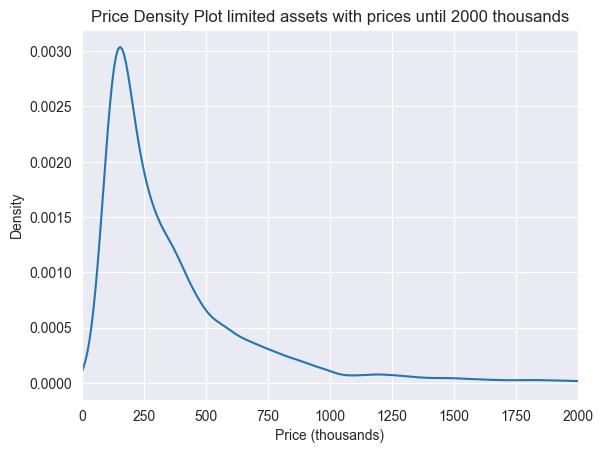

In [26]:
import matplotlib.pyplot as plt

# Divide prices by 1000 to display in thousands
prices_in_thousands = df_train.precio / 1000

# Plot the KDE with prices in thousands
prices_in_thousands.plot.kde()

# Set x-axis tick labels format to non-scientific notation
plt.ticklabel_format(style='plain', axis='x')

# Set x-axis label
plt.xlabel('Price (thousands)')

# Set the x-axis limit to start at 0 and end at 2 million
plt.xlim([0, 2000])
# plt.xlim(-10)

# Set a title
plt.title('Price Density Plot limited assets with prices until 2000 thousands')

# Save the plot
plt.savefig('price_density_plot.png')

# Show the plot
plt.show()


<Axes: ylabel='Density'>

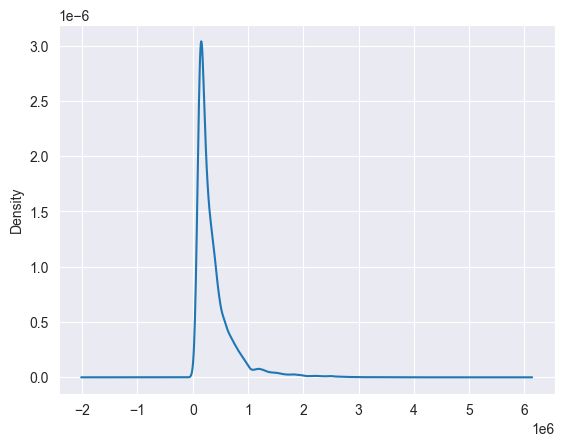

In [4]:
# Price density
df_train.precio.plot.kde()

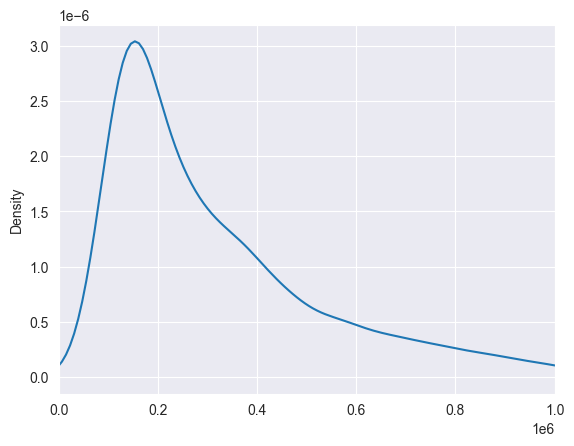

In [5]:
# Price density droping by 1M€
ax = df_train.precio.plot.kde()
plt.xlim([0, 1000000])
plt.show()

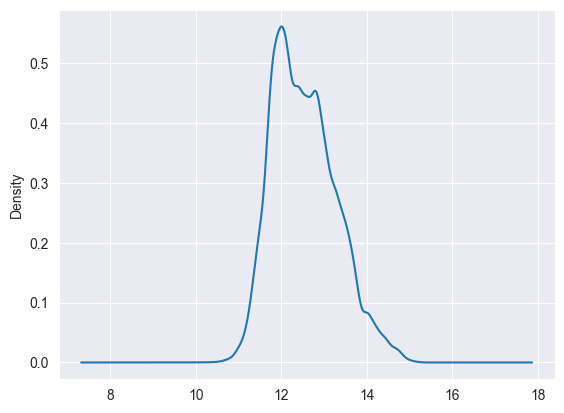

In [6]:
# Change scale of the price
df_train['precio_logaritmico'] = np.log(df_train['precio'])
ax = df_train.precio_logaritmico.plot.kde()
plt.show()


Temas a tener en cuenta:

* La distribución de valores es multimodal
* La distribución de valores no es simétrica
* El rango de valores puede ser muy amplio

El precio depende de muchos factores, pero en la literatura existen dos grandes factores:

* Precio del suelo (el suelo donde está construido)
* Precio del vuelo (lo que está construido)

Para empezar, una forma de controlar el precio del suelo es incorporar información de la zona y una forma para controla el precio del suelo es normalizar por metros cuadrados (es nuestra variable __UNITPRICE__).

En la siguiente gráfica observamos el fenómeno de la multimodalidad, significa que podemos encontrarnos inmuebles con las mismas características constructivas con distintos precios €/m², ¿por qué?, principalmente por el otro factor: __el precio del suelo__.


#### Unit Price Density (Precio del suelo)

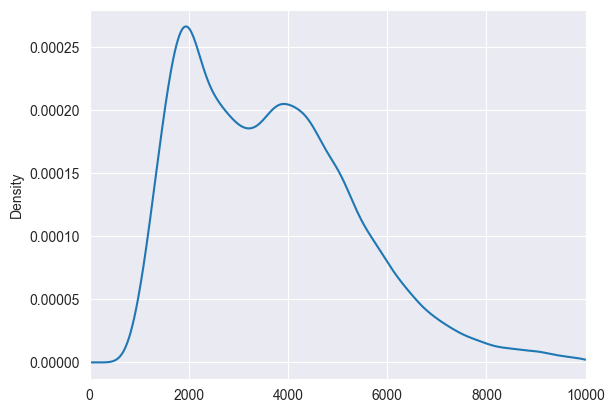

In [7]:
ax = df_train.precio_unitario_m2.plot.kde()
plt.xlim([0, 10000])
plt.show()

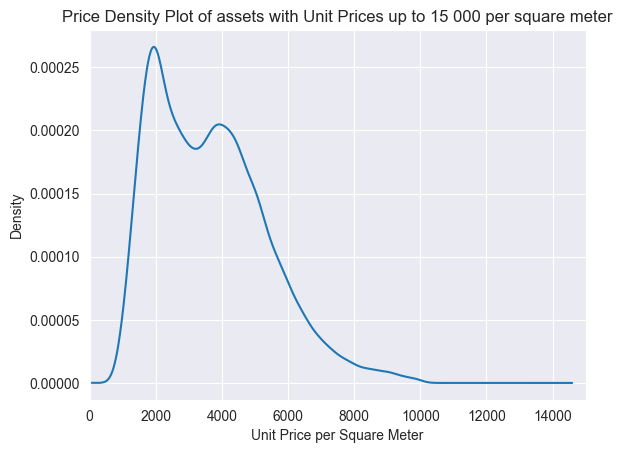

In [27]:
import matplotlib.pyplot as plt

# Plot the KDE with unit prices in thousands
df_train.precio_unitario_m2.plot.kde()

# Set x-axis tick labels format to non-scientific notation
plt.ticklabel_format(style='plain', axis='x')

# Set x-axis label
plt.xlabel('Unit Price per Square Meter')

# Set the x-axis limit to start at 0 and end at 2000
plt.xlim([0, 15000])

# Set a title
plt.title('Price Density Plot of assets with Unit Prices up to 15 000 per square meter')

# Save the plot with a different filename
plt.savefig('price_density_plot_unit_price_per_square_meter.png')

# Show the plot
plt.show()


#### Mean price by Barrio

In [8]:
# Mean price by barrio
df_metrics_barrios= df_train.groupby(['barrio']).agg({'precio':['median', 'mean', 'std'], 
                                   'precio_unitario_m2':['median', 'mean', 'std']}).reset_index()

df_metrics_barrios.columns = ['barrio', 
                         'precio_median_barrio', 'precio_mean_barrio', 'precio_std_barrio', 
                         'precio_unitario_m2_median_barrio', 'precio_unitario_m2_mean_barrio', 'precio_unitario_m2_std_barrio']

In [44]:
percentage_by_barrio = df_train.barrio.value_counts(normalize=True)*100
cumulative_percentage = percentage_by_barrio.cumsum()
cumulative_percentage

barrio
Lavapiés-Embajadores               3.999450
Malasaña-Universidad               6.822086
Goya                               9.149945
Guindalera                        11.077515
Palacio                           12.999931
                                    ...    
Aeropuerto                        99.920973
El Pardo                          99.957051
Cuatro Vientos                    99.984538
El Cañaveral - Los Berrocales     99.996564
El Plantío                       100.000000
Name: proportion, Length: 135, dtype: float64

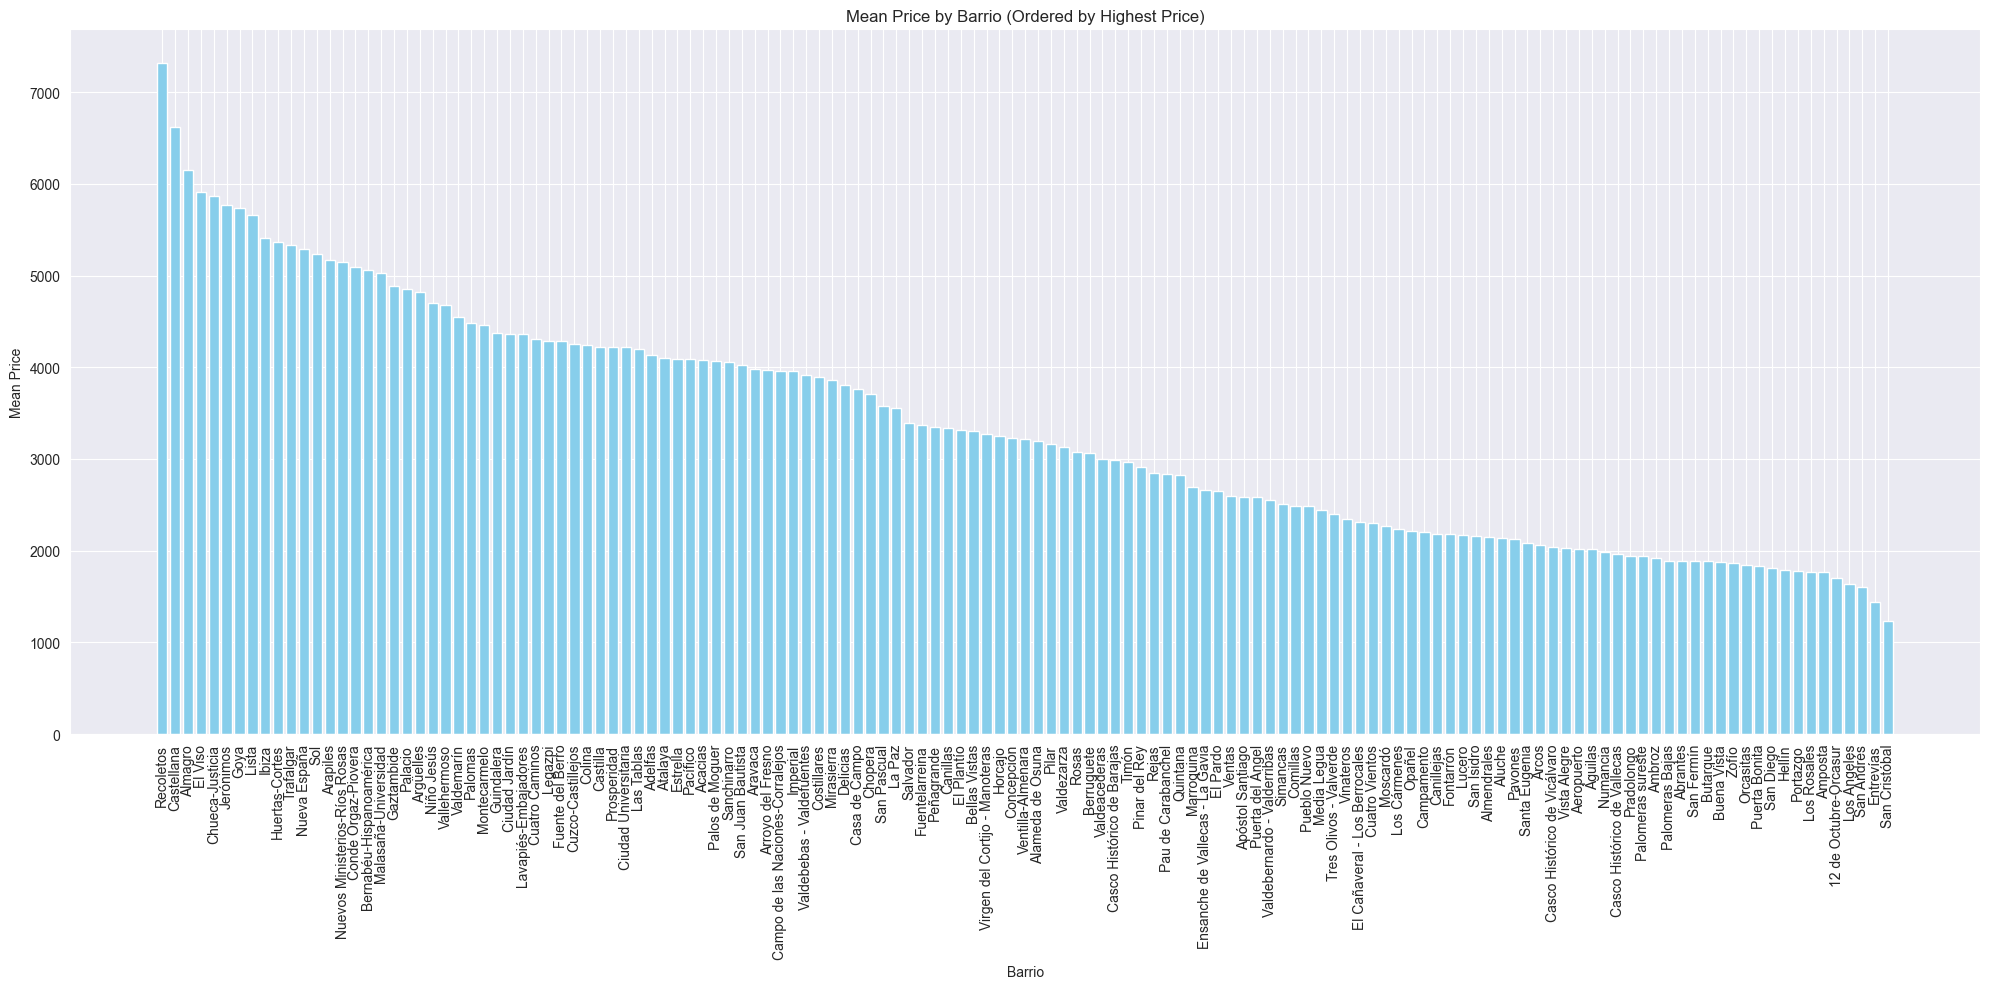

In [46]:
# Sort DataFrame by highest mean price
df_metrics_barrios_sorted = df_metrics_barrios.sort_values(by='precio_unitario_m2_mean_barrio', ascending=False)

# Plot mean price by barrio (sorted)
plt.figure(figsize=(20, 10))
plt.bar(df_metrics_barrios_sorted['barrio'], df_metrics_barrios_sorted['precio_unitario_m2_mean_barrio'], color='skyblue')
plt.xlabel('Barrio')
plt.ylabel('Mean Price')
plt.title('Mean Price by Barrio (Ordered by Highest Price)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


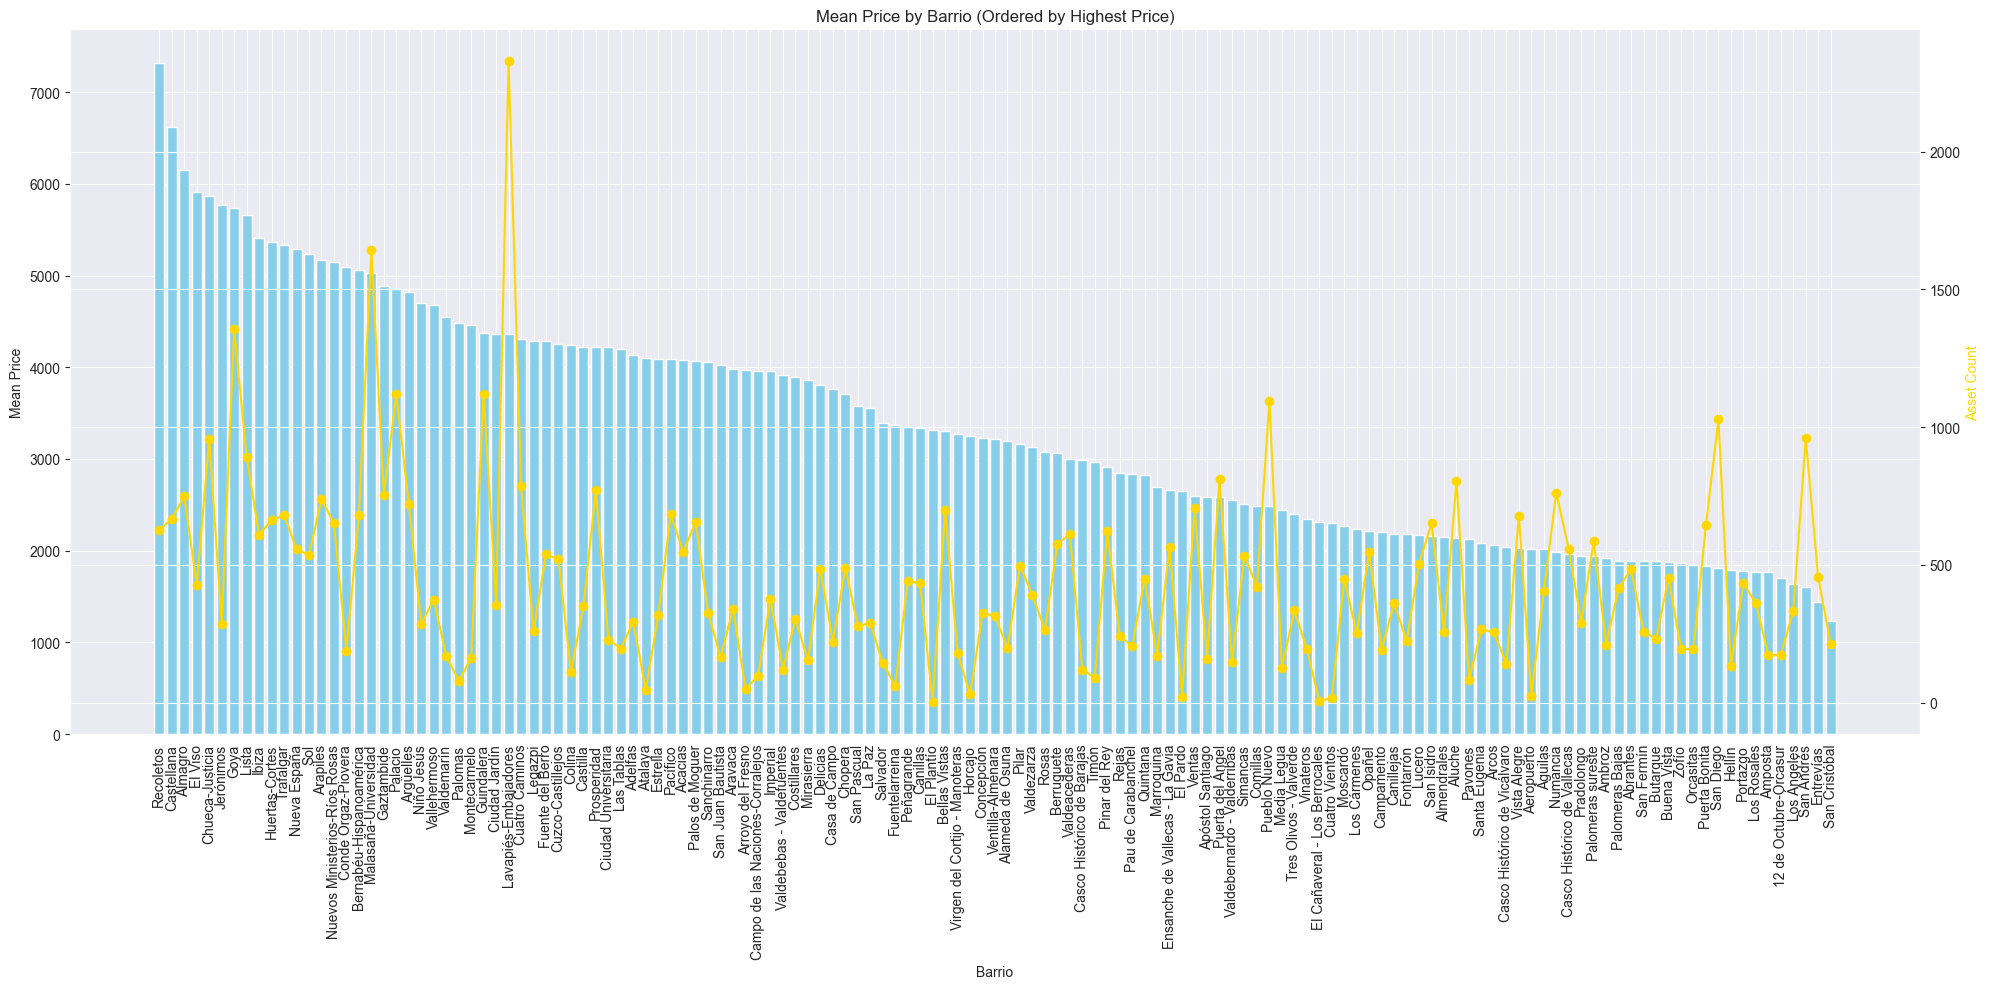

In [62]:
import matplotlib.pyplot as plt

# Define Idealista color
idealista_color = '#FFD700'  # Replace this with the color code of Idealista

# Calculate the count of assets in each barrio
barrio_counts = df_train['barrio'].value_counts()

# Sort barrio counts by barrio name
barrio_counts_sorted = barrio_counts.sort_index()

# Sort DataFrame by highest mean price
df_metrics_barrios_sorted = df_metrics_barrios.sort_values(by='precio_unitario_m2_mean_barrio', ascending=False)

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot mean price by barrio (sorted)
ax1.bar(df_metrics_barrios_sorted['barrio'], df_metrics_barrios_sorted['precio_unitario_m2_mean_barrio'], color='skyblue')
ax1.set_xlabel('Barrio')
ax1.set_ylabel('Mean Price')
ax1.set_title('Mean Price by Barrio (Ordered by Highest Price)')
ax1.tick_params(axis='x', rotation=90)

# Create a secondary y-axis for barrio counts
ax2 = ax1.twinx()
ax2.plot(df_metrics_barrios_sorted['barrio'], barrio_counts_sorted[df_metrics_barrios_sorted['barrio']], color=idealista_color, marker='o', linestyle='-', label='Asset Count')
ax2.set_ylabel('Asset Count', color=idealista_color)

# # Set background color to white
# ax1.set_facecolor('white')
# ax2.set_facecolor('white')

# Show plot
plt.tight_layout()
plt.show()


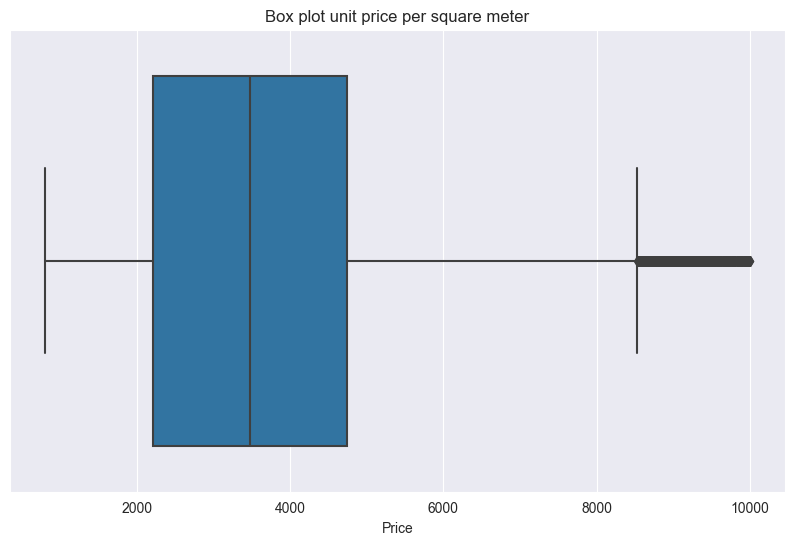

In [30]:
# Plot horizontal boxplot with price in millions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x=df_train['precio_unitario_m2'])
plt.title('Box plot unit price per square meter')
plt.xlabel('Price')
plt.savefig('Box_plot_unit_price_per_square_meter.png')


<Axes: xlabel='area_construida', ylabel='barrio'>

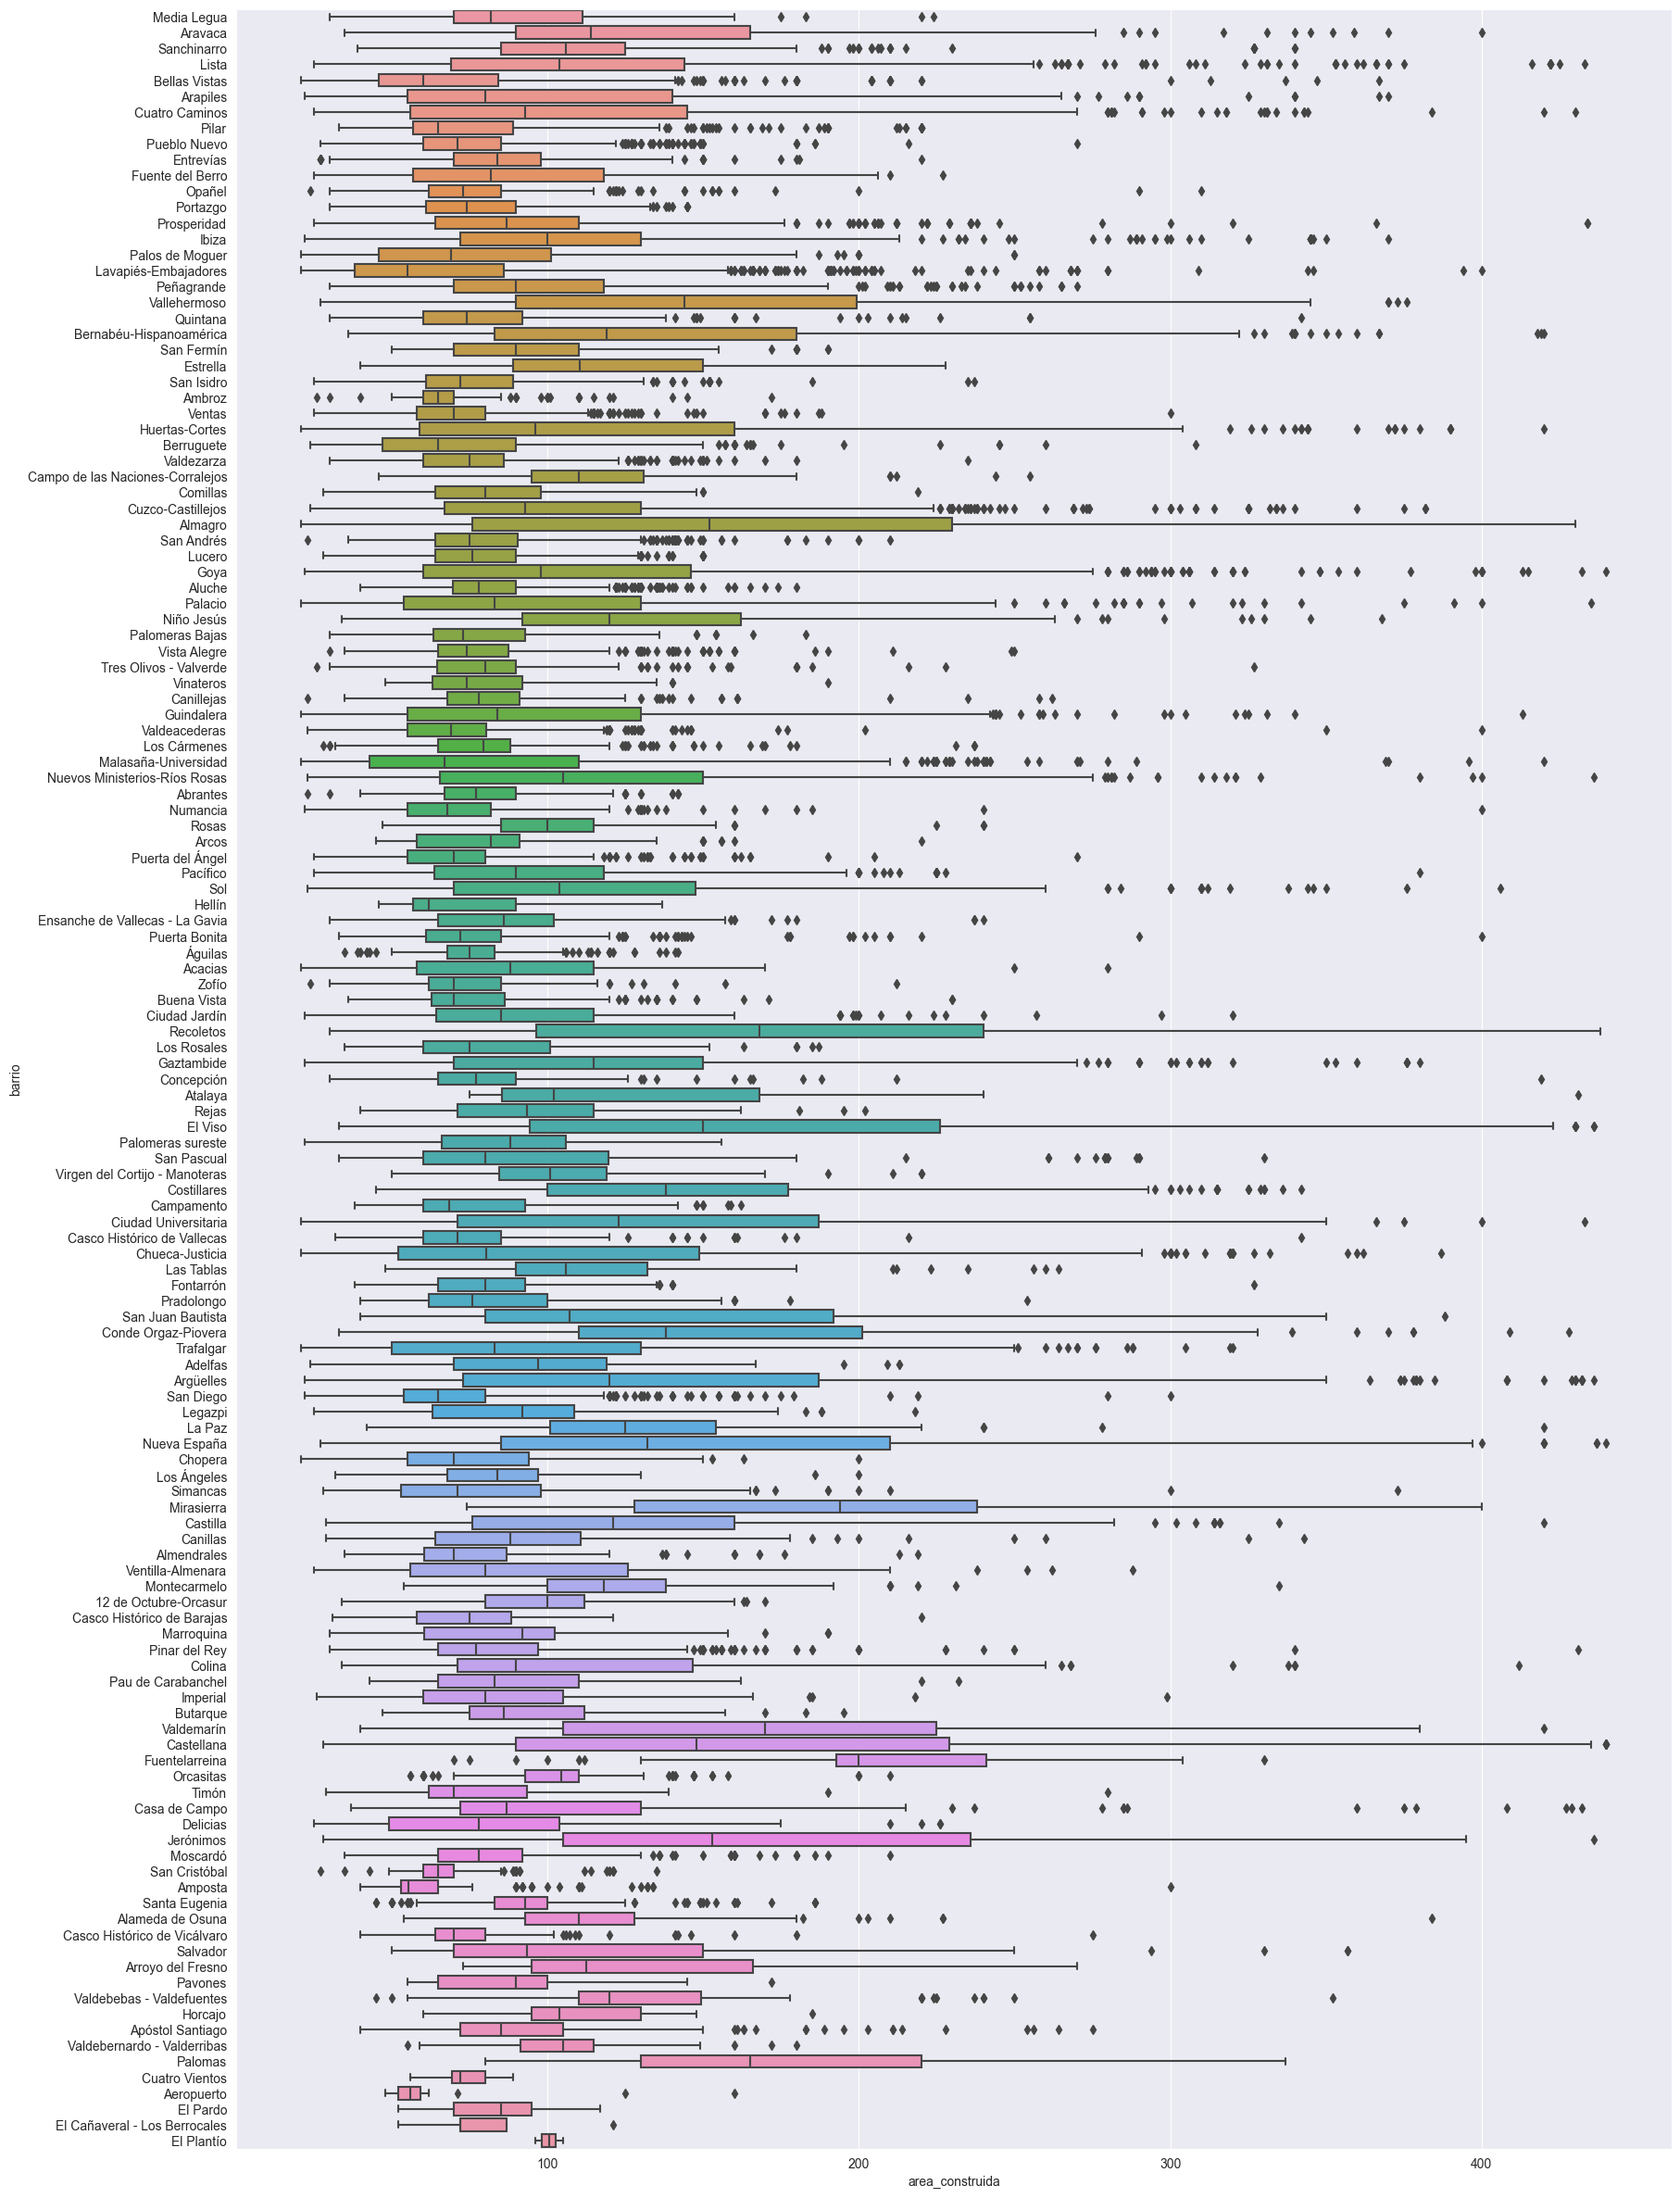

In [31]:
plt.figure(figsize=(20, 30))
sns.boxplot(data=df_train, x="area_construida", y="barrio")

In [52]:
df_train.buen_estado.value_counts()

buen_estado
1    47108
0    11100
Name: count, dtype: int64

#### Coordenadas

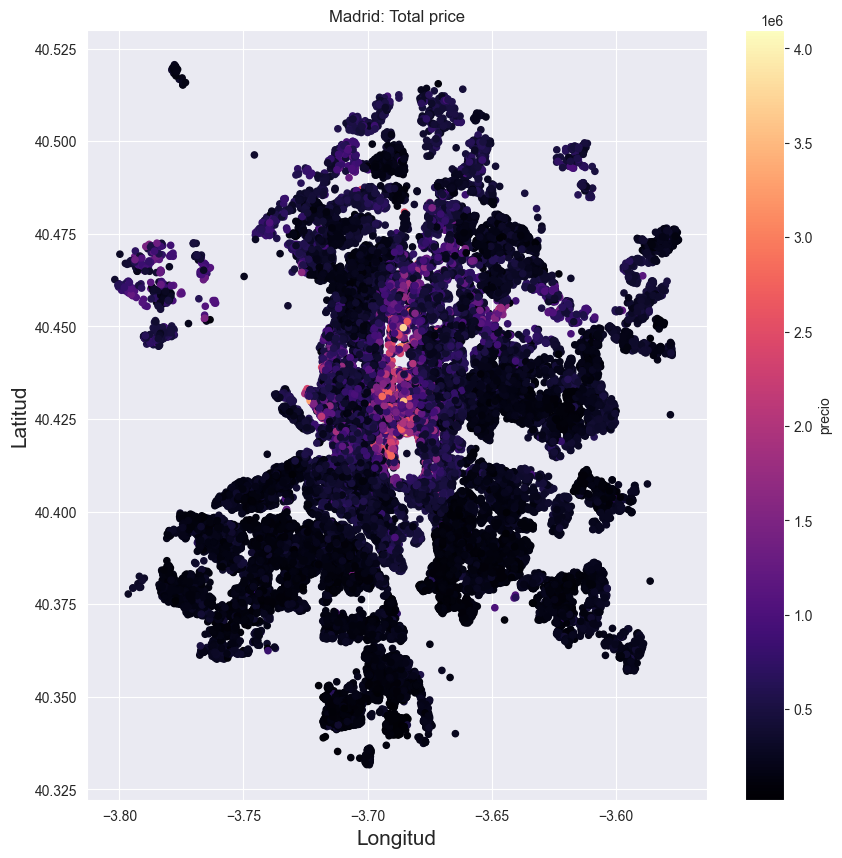

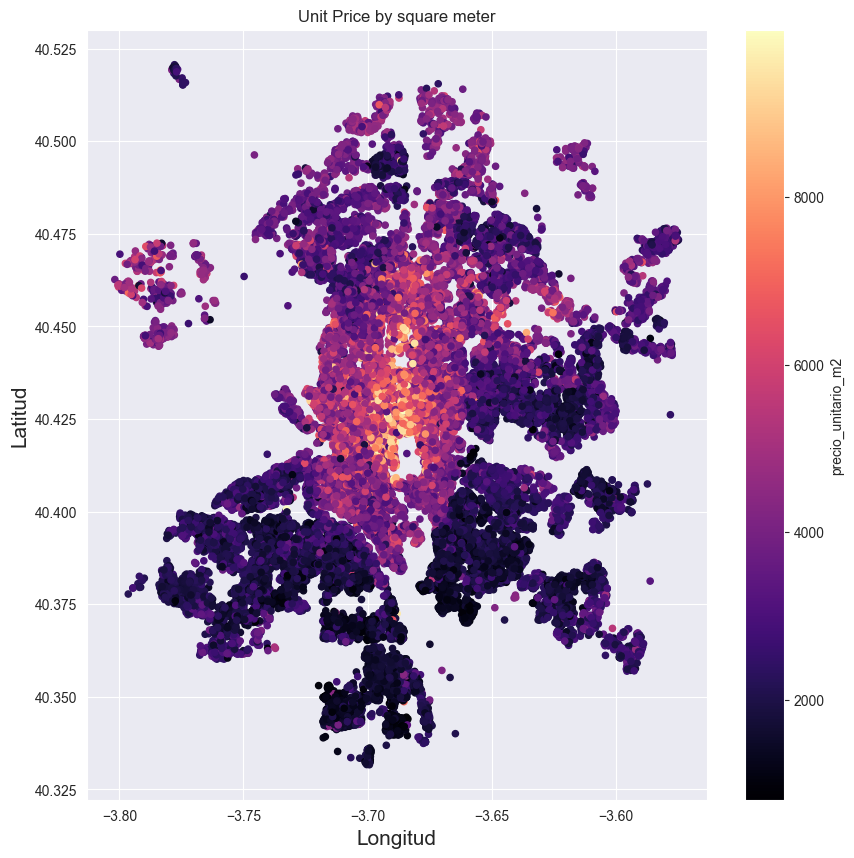

In [34]:
# Price Total €
cm = plt.cm.get_cmap('magma')  # or your colormap of choice
ax = df_train.plot.scatter(x='longitud', y='latitud', c='precio',figsize=(10, 10), cmap=cm)
ax.set_xlabel('Longitud', fontsize=15)
ax.set_ylabel('Latitud', fontsize=15)
ax.set_title('Madrid: Total price')
ax.figure.show()

# Price Total by km^2 €
cm = plt.cm.get_cmap('magma')  # or your colormap of choice
ax = df_train.plot.scatter(x='longitud', y='latitud', c='precio_unitario_m2',figsize=(10, 10), cmap=cm)
ax.set_xlabel('Longitud', fontsize=15)
ax.set_ylabel('Latitud', fontsize=15)
ax.set_title('Unit Price by square meter')
ax.figure.show()
plt.savefig('Unit_Price_by_square_meter_with_coordinates')


#### Polygons

In [ ]:
df, df_ine, df_osm, df_pois, df_polygons = extract_initial_data(
    root_dir="input_data"
)

In [ ]:
# Convert WKT strings to Shapely geometries and create a GeoDataFrame
df_polygons['geometry'] = df_polygons['WKT'].apply(wkt.loads)
gdf_polygons = geopandas.GeoDataFrame(df_polygons['geometry'], crs='epsg:4326')

# Add additional columns to the GeoDataFrame
gdf_polygons['barrio_id'] = df_polygons['LOCATIONID']
gdf_polygons['barrio'] = df_polygons['LOCATIONNAME']

# Create Point geometries using longitude and latitude coordinates from df_train
geometry = [Point(xy) for xy in zip(df_train.longitud, df.latitud)]

# Create a GeoDataFrame gdf_ads with df_prices data and geometry column
gdf_train_train = GeoDataFrame(df_train, crs="EPSG:4326", geometry=geometry)

# Apply a logarithmic scale transformation to the 'precio' column in gdf_ads
gdf_train_train['precio_logaritmico'] = np.log(gdf_train_train['precio'])


In [ ]:
# Plot the GeoDataFrame gdf_polygons as white polygons with black edges on the base plot
base = gdf_polygons.plot(color='white', edgecolor='black', figsize=(10, 10))

# Overlay gdf_ads on the same plot, plotting points colored by 'precio_unitario_km2' column
gdf_train_train.plot(ax=base, marker='o', column='precio_unitario_m2', markersize=5, cmap='inferno')

In [ ]:
# Use logaritmic price
# Plot the GeoDataFrame gdf_polygons as white polygons with black edges on the base plot
base = gdf_polygons.plot(color='white', edgecolor='black', figsize=(10, 10))

# Overlay gdf_ads on the same plot, plotting points colored by 'precio_logaritmico' column
gdf_train_train.plot(ax=base, marker='o', column='precio_logaritmico', markersize=5, cmap='inferno')


#### INE Censal Polygons

In [ ]:
# Convert WKT strings to Shapely geometries and create a GeoDataFrame for census polygons
df_ine['geometry'] = df_ine['WKT'].apply(wkt.loads)
gdf_polygons_census = geopandas.GeoDataFrame(df_ine['geometry'], crs='epsg:4326')

# Add additional column 'CUSEC' to the GeoDataFrame representing census polygons
gdf_polygons_census['cusec'] = df_ine['CUSEC']

In [ ]:
# Plot the census polygons as white polygons with black edges on the base plot
base = gdf_polygons_census.plot(color='white', edgecolor='black', figsize=(10, 10))

# Overlay gdf_ads on the same plot, plotting points colored by 'precio_unitario_km2' column
gdf_train_train.plot(ax=base, marker='o', column='precio_unitario_m2', markersize=5, cmap='inferno')


#### Points of Interest - Open Street Map - Basis

In [35]:
# TODO - nice to have: conteos por la superficie del barrios  
# Show points of interest
unique_codes = df_osm['CODE'].unique()
cmap = plt.cm.get_cmap('magma', len(unique_codes))

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 10))
for i, code in enumerate(unique_codes):
    subset = df_osm[df_osm['CODE'] == code]
    ax.scatter(subset['LNG'], subset['LAT'], c=cmap(i), label=code)

# Set labels and title
ax.set_xlabel('Longitud', fontsize=15)
ax.set_ylabel('Latitud', fontsize=15)
ax.set_title('Points of Interest - Open Street Map')

# Add legend
ax.legend()
plt.show()


NameError: name 'df_osm' is not defined

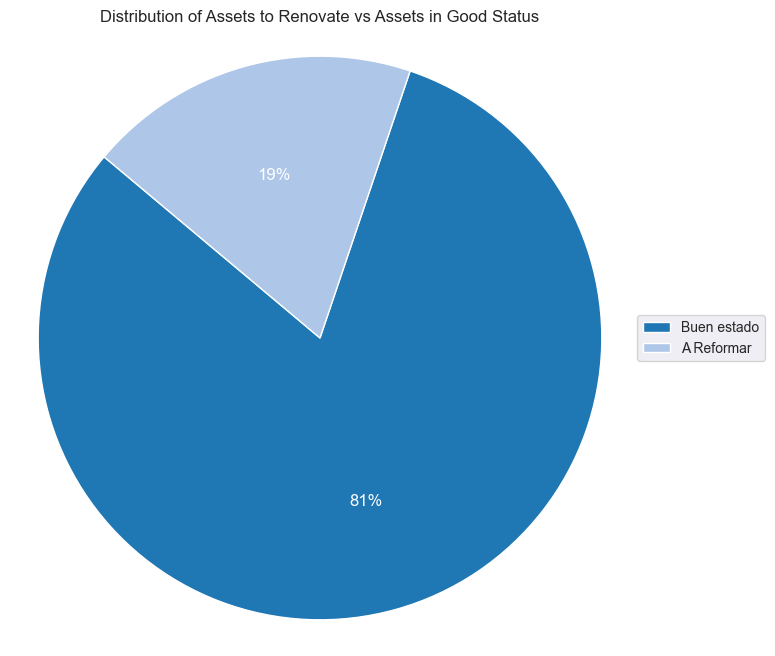

In [61]:
import matplotlib.pyplot as plt

# Get value counts of buen_estado column
buen_estado_counts = df_train['buen_estado'].value_counts()

# Map labels to buen_estado values
labels = buen_estado_counts.index.map({1: 'Buen estado', 0: 'A Reformar'})

# Plot pie chart
plt.figure(figsize=(8, 8))
_, _, autotexts = plt.pie(buen_estado_counts, labels=labels, autopct='%1.0f%%', startangle=140, colors=['#1f77b4', '#aec7e8'], textprops={'color': 'white'})
plt.title('Distribution of Assets to Renovate vs Assets in Good Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust data label properties
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)  # Adjust font size

# Create legend on the right side of the pie chart
plt.legend(loc='center left', labels=labels, bbox_to_anchor=(1, 0.5)) 

# Show plot
plt.show()


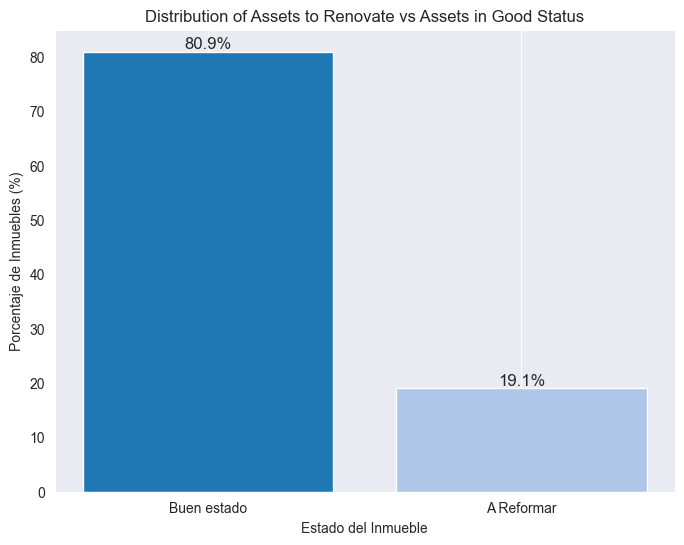

In [64]:
import matplotlib.pyplot as plt

# Get value counts of buen_estado column
buen_estado_counts = df_train['buen_estado'].value_counts()

# Calculate percentages
total_assets = buen_estado_counts.sum()
percentages = buen_estado_counts / total_assets * 100

# Map labels to buen_estado values
labels = buen_estado_counts.index.map({1: 'Buen estado', 0: 'A Reformar'})

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, percentages, color=['#1f77b4', '#aec7e8'])
plt.title('Distribution of Assets to Renovate vs Assets in Good Status')
plt.xlabel('Estado del Inmueble')
plt.ylabel('Porcentaje de Inmuebles (%)')
plt.grid(axis='y')  # Add grid lines for better readability

# Add data labels (percentages) to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=12)

# Show plot
plt.show()


# Outliers: correr antes da função detect_outliers in preprocessing

In [66]:
def hist_plot_outliers(df, name_variable):
    # Create a new figure and axis for each plot
    fig, ax = plt.subplots()

    # Plot histogram with automatic bins
    ax.hist(df[name_variable], bins="auto", edgecolor="black")

    # Adding labels and title
    ax.set_xlabel(name_variable)
    ax.set_ylabel("Count")
    ax.set_title("Histogram of " + name_variable)

    # Display the plot
    plt.show()
    
percentile_995_values = {}
variables_most_correlated_w_target=['n_banos','n_habitaciones', 'area_construida', 'distancia_castellana']
for var in variables_most_correlated_w_target:
    percentile_995_values[var] = df_train[var].quantile(0.995)
for var in variables_most_correlated_w_target:
    hist_plot_outliers(df=df_train[df_train[var] > percentile_995_values[var]],name_variable = var)
    
